In [57]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

#1. Data Preprocessing

In [59]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [61]:
df.isna().sum()

,0
MEMBER_NO,0
FFP_DATE,0
FIRST_FLIGHT_DATE,0
GENDER,3
FFP_TIER,0
WORK_CITY,2269
WORK_PROVINCE,3248
WORK_COUNTRY,26
AGE,420
LOAD_TIME,0


In [62]:
#cek unique value aneh
weird_values_dict = {}

for col in ['WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']:
    unique_vals = df[col].unique()
    # Cari nilai aneh di kedua kolom
    weird_values = [val for val in unique_vals if pd.isna(val)
                    or str(val).strip() == ''
                    or str(val).strip() == '.'
                    or str(val).strip() in ['-', '_', '?']]

    weird_values_dict[col] = weird_values

for col, vals in weird_values_dict.items():
    print(f"Kolom: {col}")
    print(f"Jumlah nilai unik aneh: {len(vals)}")
    print(vals)
    print('-'*50)


Kolom: WORK_CITY
Jumlah nilai unik aneh: 7
['.', nan, '\u3000', '-', '\u3000\u3000', '\u3000\u3000\u3000', '?']
--------------------------------------------------
Kolom: WORK_PROVINCE
Jumlah nilai unik aneh: 5
[nan, '.', '-', '\u3000', '\u3000\u3000']
--------------------------------------------------
Kolom: WORK_COUNTRY
Jumlah nilai unik aneh: 1
[nan]
--------------------------------------------------


In [63]:
#handling null
weird_values_work_city = ['.', np.nan, '\u3000', '-', '\u3000\u3000', '\u3000\u3000\u3000', '?']
weird_values_work_province = [np.nan, '.', '-', '\u3000', '\u3000\u3000']

df['WORK_CITY'] = df['WORK_CITY'].replace(weird_values_work_city, 'Unknown')
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].replace(weird_values_work_province, 'Unknown')
df['WORK_COUNTRY'] = df['WORK_COUNTRY'].fillna('Unknown')
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean(), inplace=True)


In [64]:
df.isna().sum()

,0
MEMBER_NO,0
FFP_DATE,0
FIRST_FLIGHT_DATE,0
GENDER,0
FFP_TIER,0
WORK_CITY,0
WORK_PROVINCE,0
WORK_COUNTRY,0
AGE,0
LOAD_TIME,0


In [65]:
#cek duplicated
df.duplicated().sum()

np.int64(0)

In [66]:
#ubah data type date time
date_cols = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62988 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          62988 non-null  object        
 6   WORK_PROVINCE      62988 non-null  object        
 7   WORK_COUNTRY       62988 non-null  object        
 8   AGE                62988 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62988 non-null  float64       
 13  SUM_YR_2           62988 non-null  float64       
 14  SEG_KM

In [68]:
import pandas as pd
import numpy as np

# Bersihkan spasi / karakter tersembunyi
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].astype(str).str.strip()

# Cek apakah semua baris angka
if df['LAST_FLIGHT_DATE'].str.isdigit().all():
    sample = df['LAST_FLIGHT_DATE'].iloc[0]
    if len(sample) == 8:  # Format YYYYMMDD
        df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], format='%Y%m%d', errors='coerce')
    else:  # Excel serial number
        df['LAST_FLIGHT_DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['LAST_FLIGHT_DATE'].astype(int), unit='D')
else:
    # Kalau string tanggal biasa
    df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce', infer_datetime_format=True)

# Isi NaT yang tersisa dengan tanggal maksimum kolom
df['LAST_FLIGHT_DATE'].fillna(df['LAST_FLIGHT_DATE'].max(), inplace=True)

print("LAST_FLIGHT_DATE sudah bersih:")
print(df['LAST_FLIGHT_DATE'].head())


LAST_FLIGHT_DATE sudah bersih:
0   2014-03-31
1   2014-03-25
2   2014-03-21
3   2013-12-26
4   2014-03-27
Name: LAST_FLIGHT_DATE, dtype: datetime64[ns]


In [69]:
df['MEMBERSHIP_DAYS'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days
df['DAYS_SINCE_LAST_FLIGHT'] = (df['LOAD_TIME'] - df['LAST_FLIGHT_DATE']).dt.days
df['AVG_KM_PER_FLIGHT'] = df['SEG_KM_SUM'] / df['FLIGHT_COUNT']


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MEMBER_NO               62988 non-null  int64         
 1   FFP_DATE                62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE       62988 non-null  datetime64[ns]
 3   GENDER                  62988 non-null  object        
 4   FFP_TIER                62988 non-null  int64         
 5   WORK_CITY               62988 non-null  object        
 6   WORK_PROVINCE           62988 non-null  object        
 7   WORK_COUNTRY            62988 non-null  object        
 8   AGE                     62988 non-null  float64       
 9   LOAD_TIME               62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT            62988 non-null  int64         
 11  BP_SUM                  62988 non-null  int64         
 12  SUM_YR_1                62988 non-null  float6

#2. Exploratory Data Analysis (EDA)

In [71]:
df.describe(include='number').iloc[:,1:]

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBERSHIP_DAYS,DAYS_SINCE_LAST_FLIGHT,AVG_KM_PER_FLIGHT
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000,62988.000000,62988.000000,62988.000000
mean,4.102162,42.466502,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155,1485.000826,174.180717,1579.778490
std,0.373856,9.853632,14.049471,16339.486151,8073.902161,8693.824796,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164,847.222941,183.764884,1125.229213
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,365.000000,0.000000,184.000000
25%,4.000000,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000,732.000000,27.000000,1061.259868
50%,4.000000,41.000000,7.000000,5700.000000,2844.000000,2784.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000,1270.000000,106.000000,1362.869748
75%,4.000000,48.000000,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000,2179.000000,266.000000,1760.500000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000,3437.000000,729.000000,13320.500000


In [72]:
df.describe(include='object')

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62988,62988,62988,62988
unique,2,3229,1162,119
top,Male,guangzhou,guangdong,CN
freq,48137,9386,17509,57748


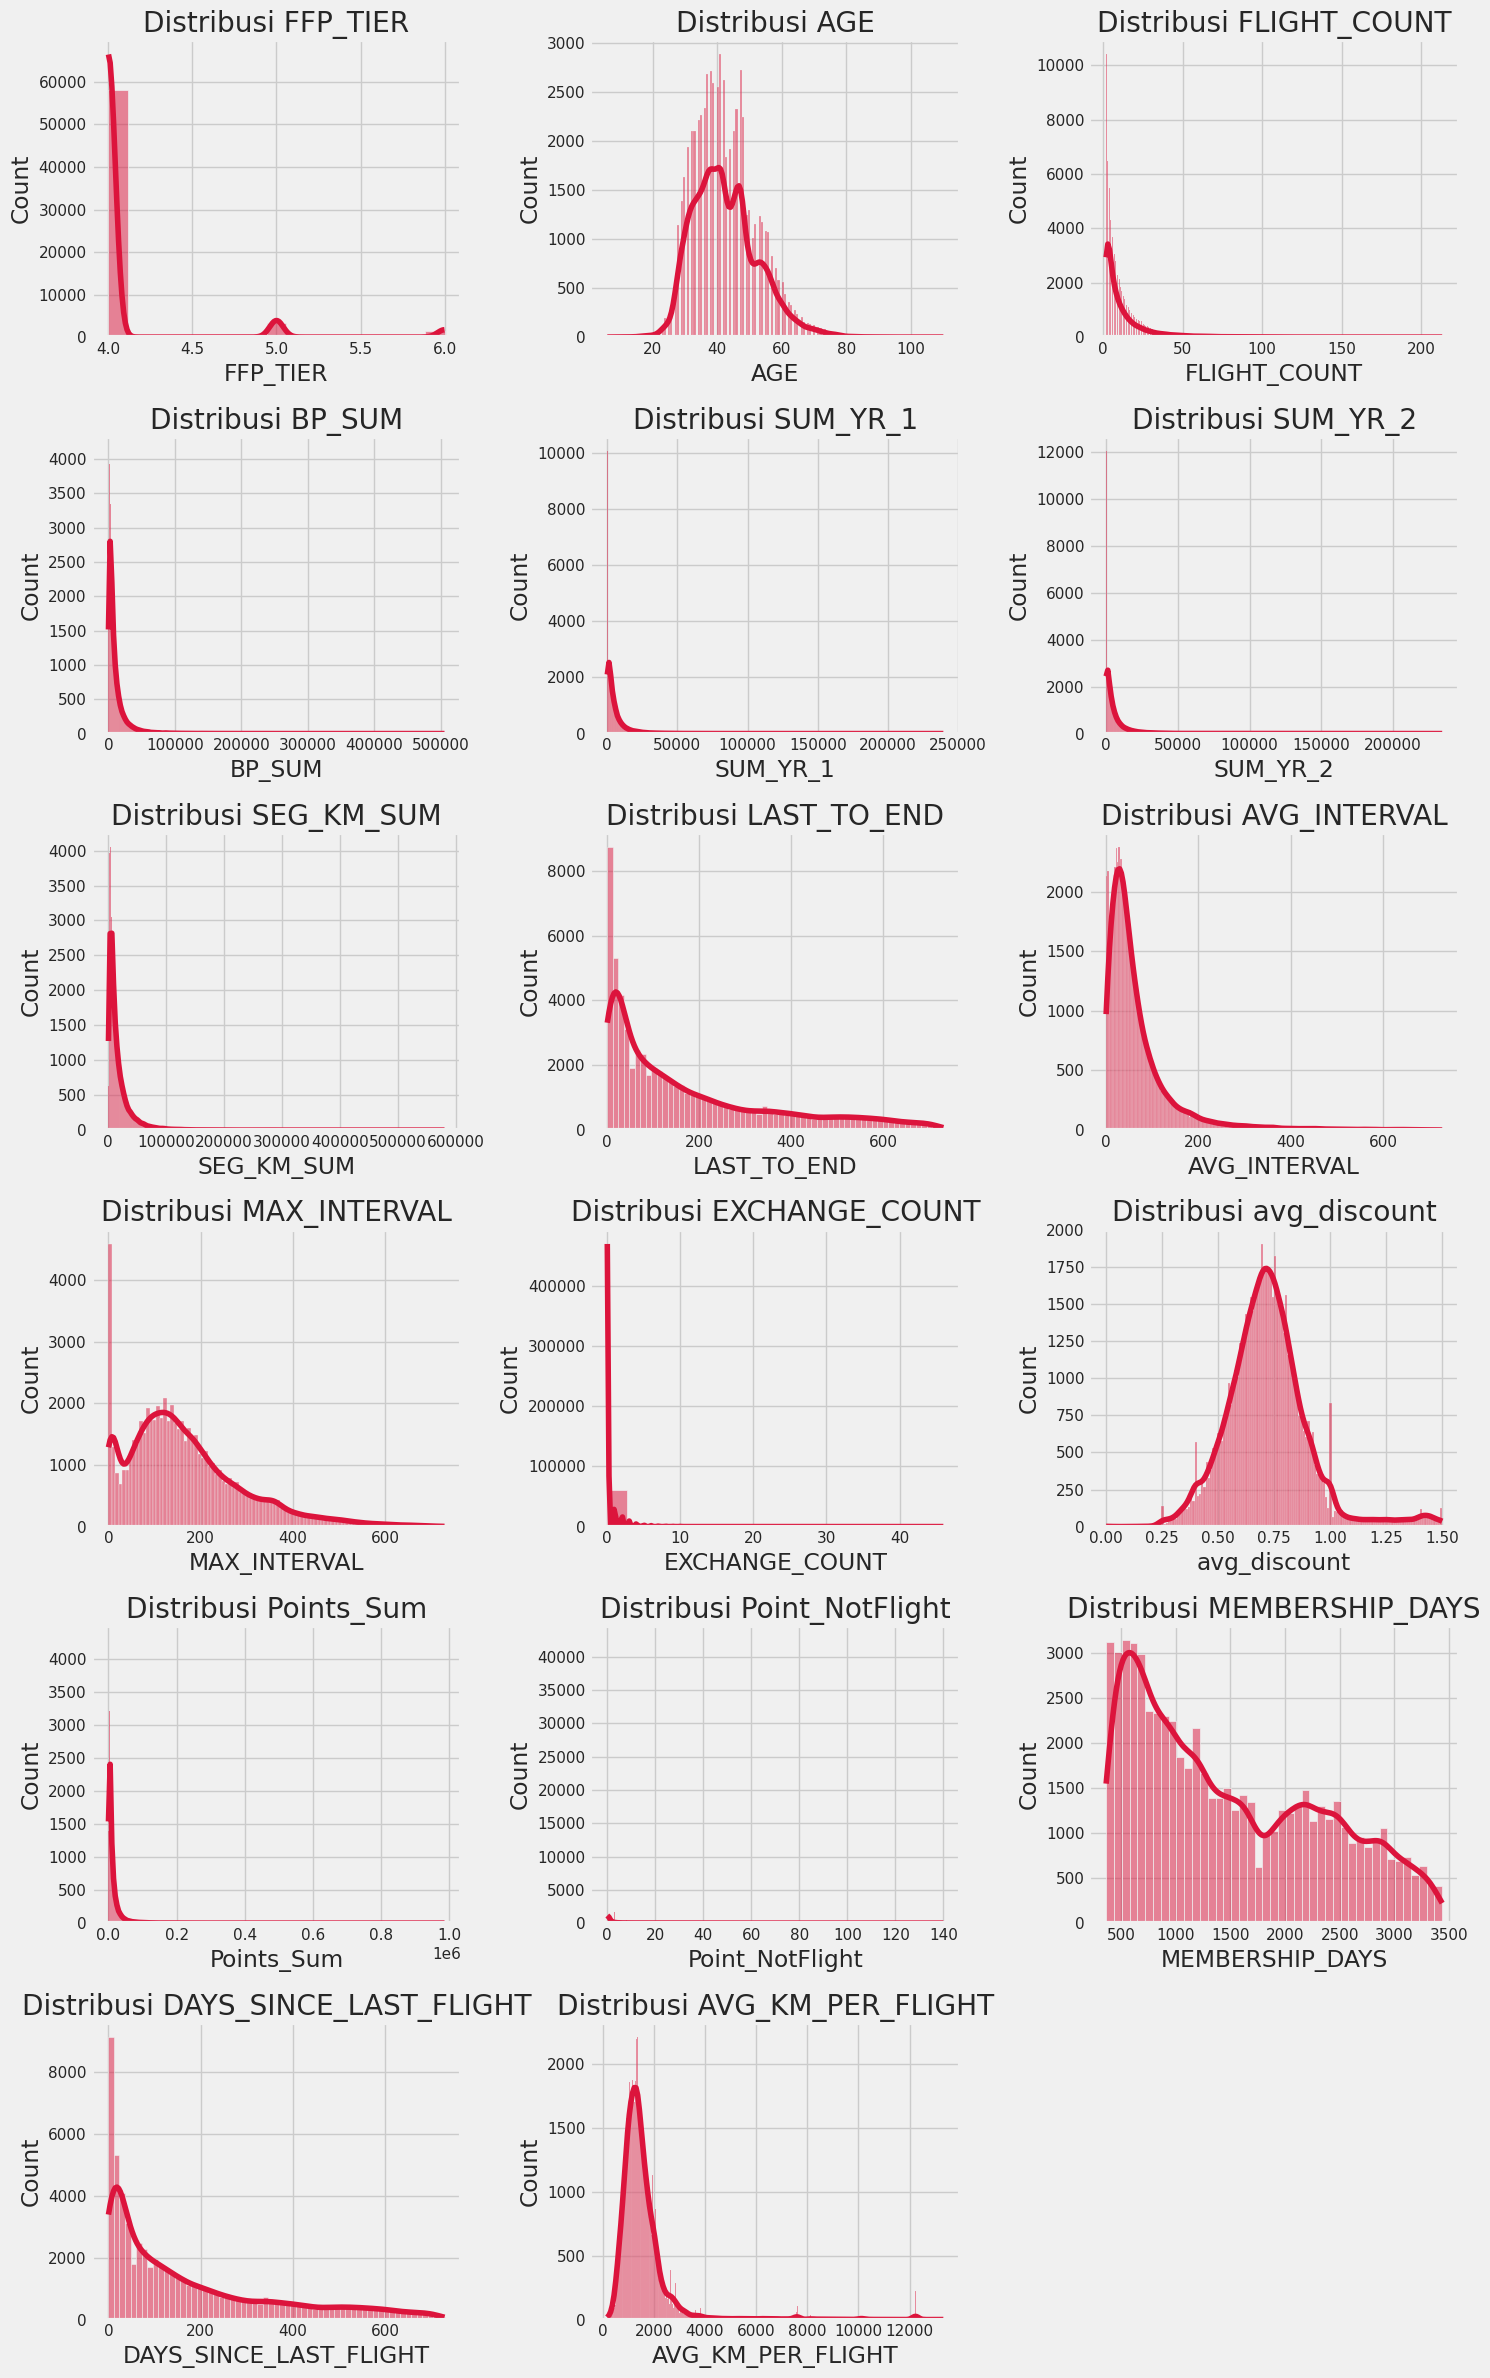

In [73]:
num_col = df.select_dtypes(include='number').columns.drop('MEMBER_NO')

n_cols = 3
n_rows = (len(num_col) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(df[col], kde=True, color='crimson', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


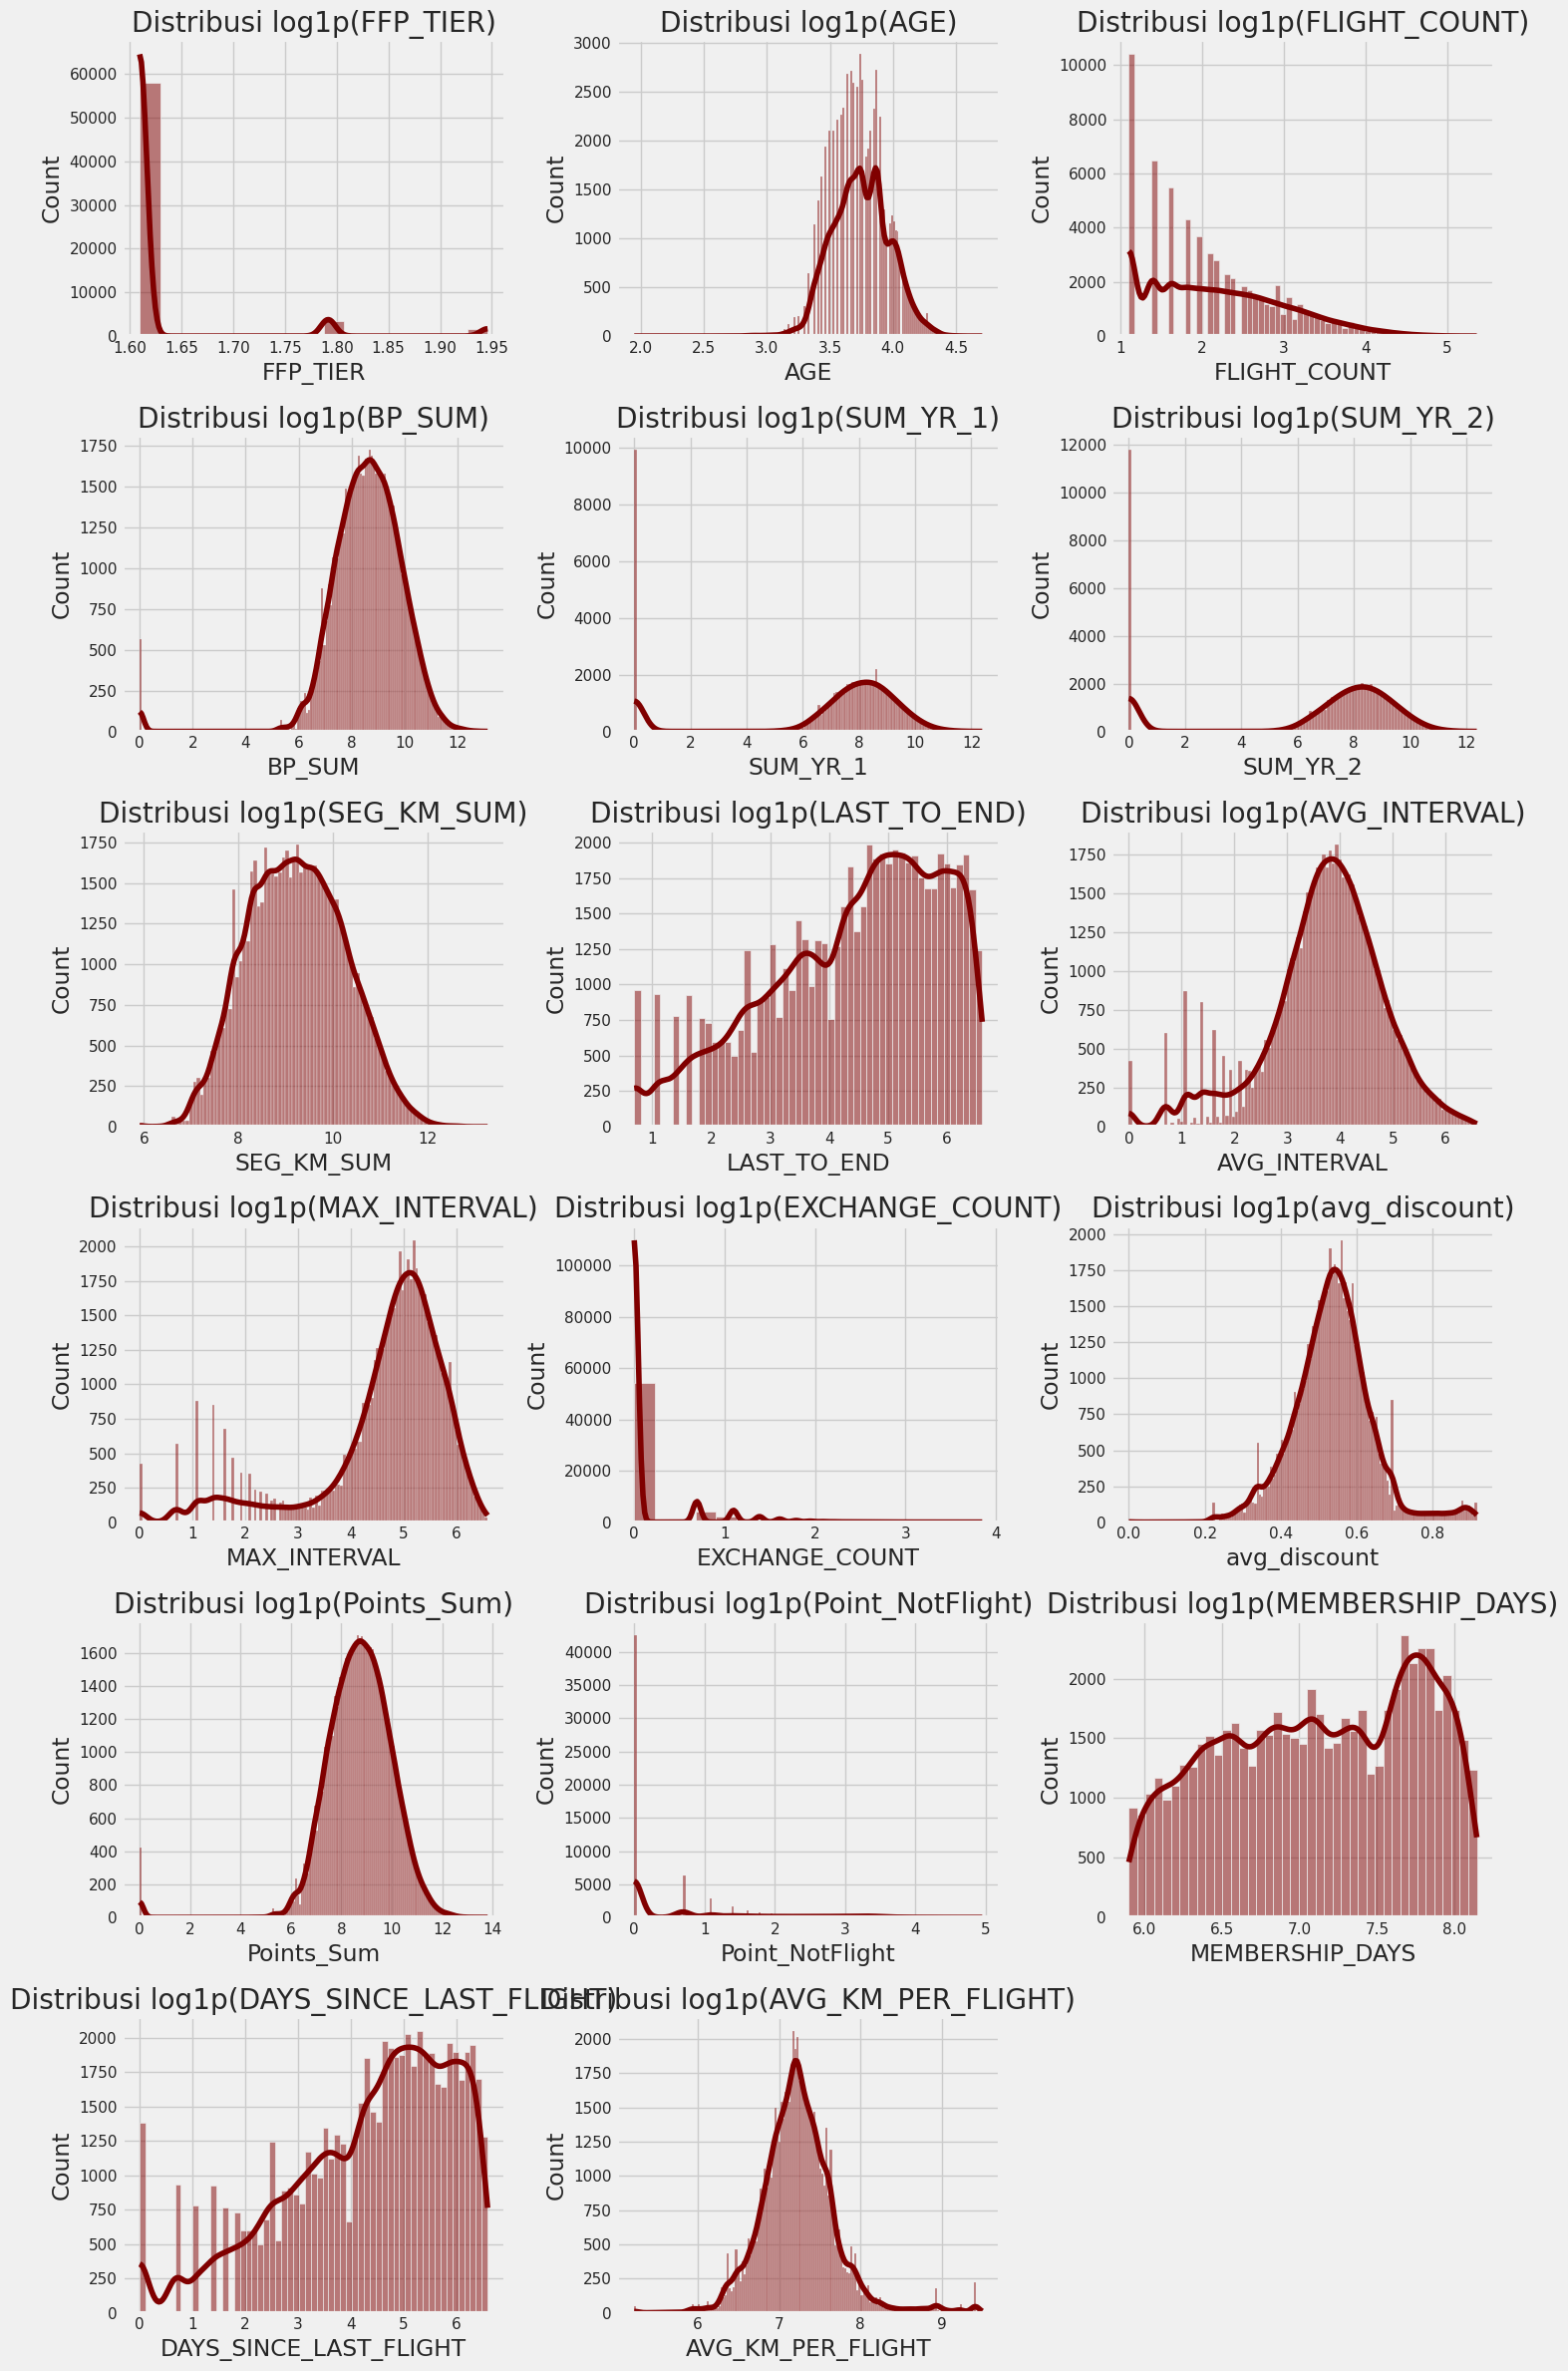

In [74]:
n_cols = 3
n_rows = (len(num_col) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_col):
    # Transformasi log1p untuk mengurangi skew
    transformed = np.log1p(df[col].clip(lower=0))  # pastikan negatif jadi 0
    sns.histplot(transformed, kde=True, color='maroon', ax=axes[i])
    axes[i].set_title(f'Distribusi log1p({col})')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

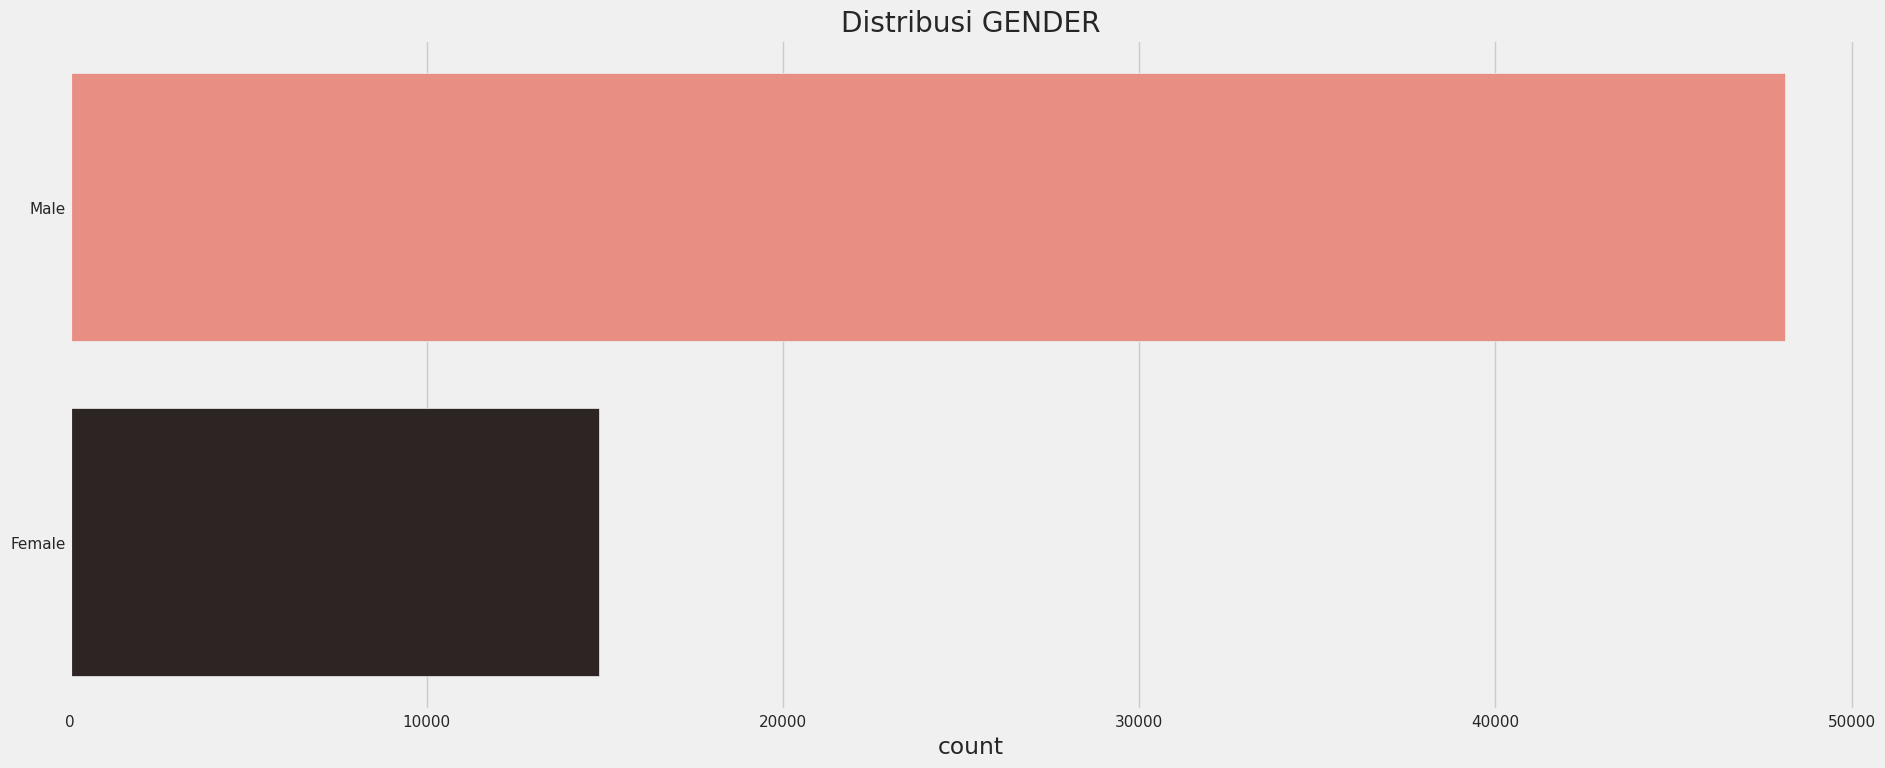

In [75]:
sns.countplot(y='GENDER', data=df, palette='dark:salmon_r')
plt.ylabel(None)
plt.title(f'Distribusi GENDER')
plt.show()


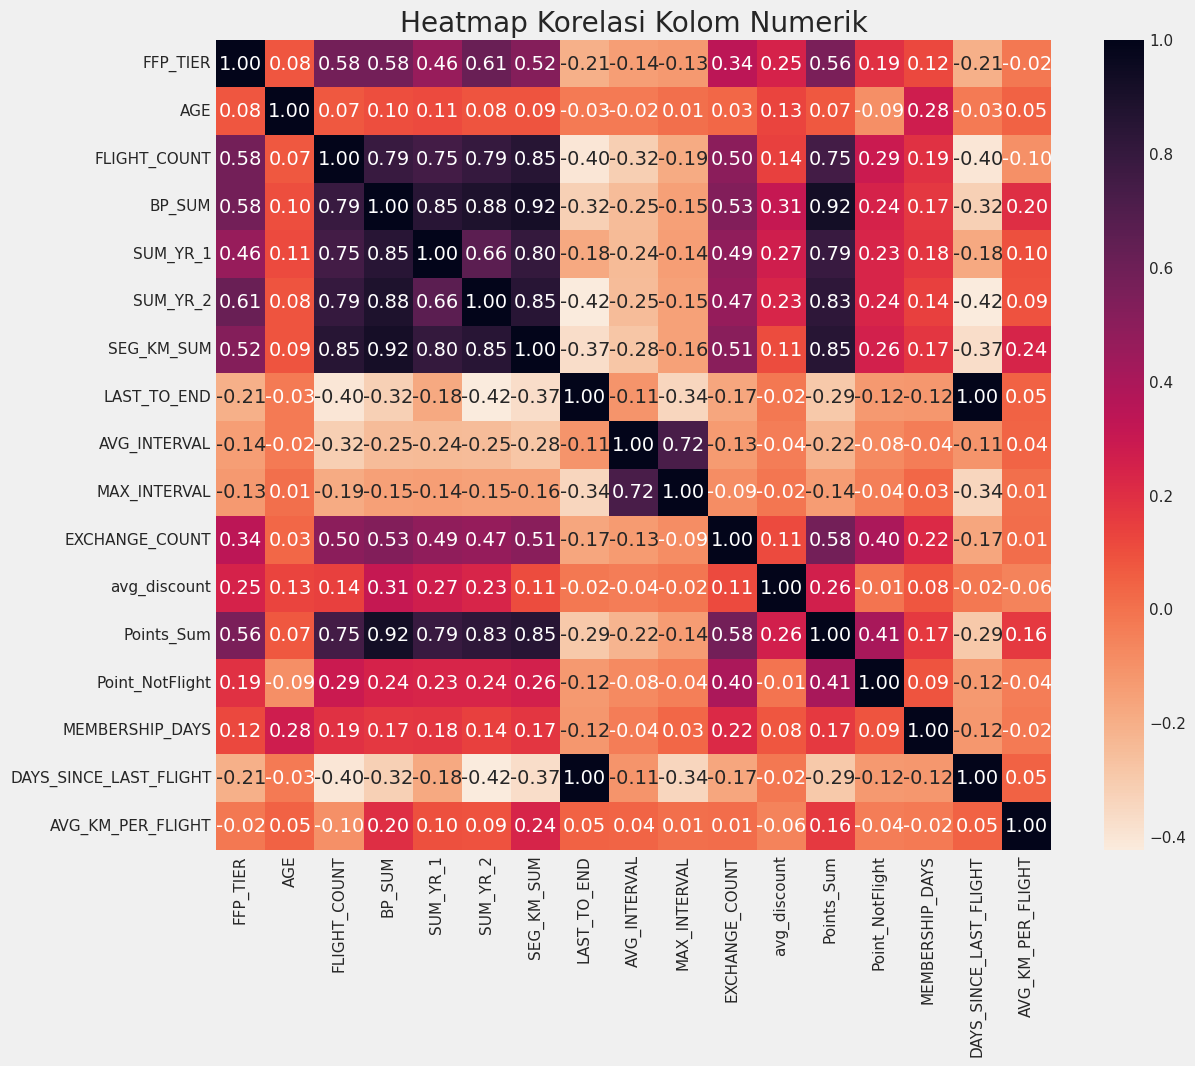

In [76]:
num_col = df.select_dtypes(include='number').drop(columns='MEMBER_NO')

plt.figure(figsize=(12, 10))
corr = num_col.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="rocket_r")
plt.title("Heatmap Korelasi Kolom Numerik")
plt.show()


In [77]:
import itertools

num_col = df.select_dtypes(include='number').drop(columns='MEMBER_NO')

pairs = list(itertools.combinations(num_col.columns, 2))

pair_corr = []
for x, y in pairs:
    corr_value = num_col[x].corr(num_col[y])
    pair_corr.append((x, y, corr_value))

# Buat dataframe dan urutkan berdasarkan korelasi absolut tertinggi
corr_df = pd.DataFrame(pair_corr, columns=['X', 'Y', 'Corr'])
corr_df['AbsCorr'] = corr_df['Corr'].abs()
corr_df_sorted = corr_df.sort_values(by='AbsCorr', ascending=False)

# Ambil top 12
top12_pairs = corr_df_sorted.head(10)
top12_pairs

,X,Y,Corr,AbsCorr
98,LAST_TO_END,DAYS_SINCE_LAST_FLIGHT,0.999907,0.999907
53,BP_SUM,Points_Sum,0.923271,0.923271
47,BP_SUM,SEG_KM_SUM,0.921724,0.921724
46,BP_SUM,SUM_YR_2,0.884308,0.884308
86,SEG_KM_SUM,Points_Sum,0.853014,0.853014
34,FLIGHT_COUNT,SEG_KM_SUM,0.850411,0.850411
45,BP_SUM,SUM_YR_1,0.849428,0.849428
70,SUM_YR_2,SEG_KM_SUM,0.848765,0.848765
76,SUM_YR_2,Points_Sum,0.826409,0.826409
59,SUM_YR_1,SEG_KM_SUM,0.802548,0.802548


In [78]:
#yang perlu logaritmic transformation karena distribusinya buruk
log_feats = [
    'FLIGHT_COUNT',
    'SEG_KM_SUM',
    'BP_SUM',
    'SUM_YR_1',
    'AVG_INTERVAL'
]

df[log_feats] = np.log1p(df[log_feats])


In [79]:
#berdasarkan korelasi, distribusi, dan tipe data. kolom2 yang digunakan adalah:
feats = [
    'SEG_KM_SUM',          # aktivitas fisik (wakil flight_count, km)
    'BP_SUM',              # value / revenue (wakil SUM_YR & points)
    'LAST_TO_END',         # recency (wakil days_since_last_flight)
    'AVG_INTERVAL',        # frequency spacing (wakil max_interval)
    'MEMBERSHIP_DAYS',     # tenure
    'AVG_KM_PER_FLIGHT',   # style terbang
    'avg_discount'         # sensitivitas harga
]

X = df[feats].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

new_df = pd.DataFrame(data=X_std, columns=feats)
new_df.head()


,SEG_KM_SUM,BP_SUM,LAST_TO_END,AVG_INTERVAL,MEMBERSHIP_DAYS,AVG_KM_PER_FLIGHT,avg_discount
0,3.963511,3.255803,-0.952668,-2.062996,1.441190,1.053608,1.294761
1,3.294856,3.017629,-0.920027,-1.764407,1.312533,0.460285,2.862377
2,3.260997,2.994879,-0.898267,-1.748990,1.333779,0.463724,2.875110
3,3.252749,2.966039,-0.430420,-0.342950,0.663348,9.466788,1.991703
4,3.347675,2.816584,-0.930907,-1.827049,0.390690,0.408117,1.343400


#3. Clustering dengan K-Means


jumlah cluster :  2  nilai_inertia :  345800.18286584213
jumlah cluster :  3  nilai_inertia :  294586.24406708597
jumlah cluster :  4  nilai_inertia :  271201.5419196288
jumlah cluster :  5  nilai_inertia :  251668.50450812682
jumlah cluster :  6  nilai_inertia :  213668.30804281475
jumlah cluster :  7  nilai_inertia :  197836.22458061317
jumlah cluster :  8  nilai_inertia :  183099.78663869353
jumlah cluster :  9  nilai_inertia :  173627.65945187712
jumlah cluster :  10  nilai_inertia :  157990.63320659008


<Axes: >

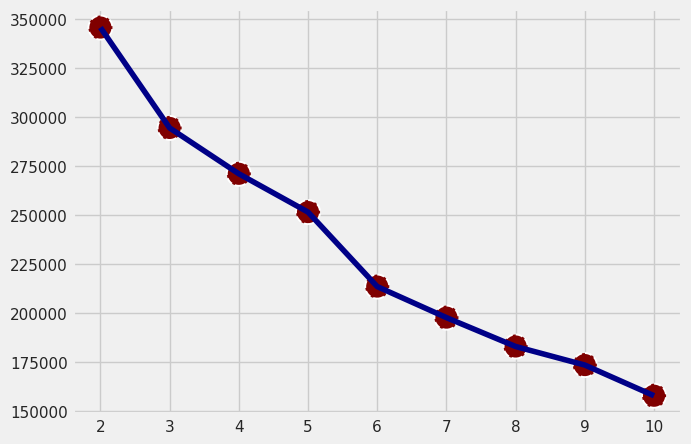

In [80]:
from sklearn.cluster import KMeans
list_inertia = []

for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)

  # df
  kmeans.fit(new_df)
  # array
  # kmeans.fit(X_std)

  nilai_inertia = kmeans.inertia_
  list_inertia.append(nilai_inertia)
  print('jumlah cluster : ',i,' nilai_inertia : ', nilai_inertia)

plt.figure(figsize=(7, 5))

sns.lineplot(x=range(2, 11), y=list_inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=list_inertia, s=300, color='#800000',  linestyle='--')

In [81]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df)
    preds = kmeans.predict(new_df)

    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


<Axes: >

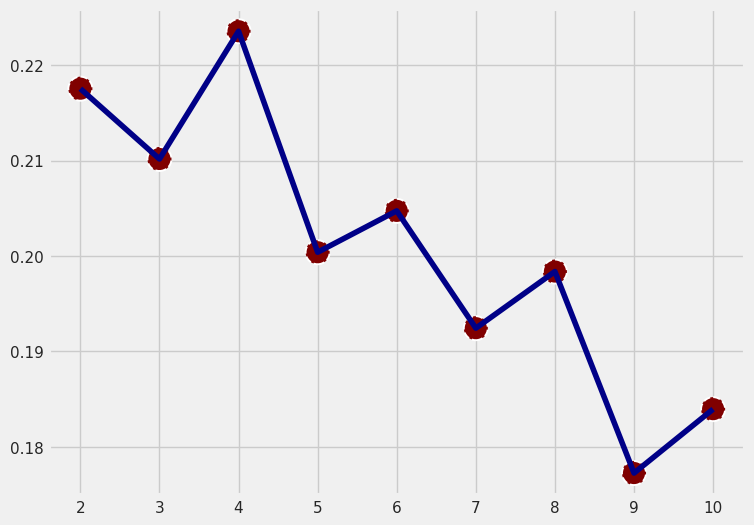

In [94]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

#4. Visualisasi Hasil Clustering

In [87]:
#pakai PCA karena x nya banyak
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(new_df)
print(pca_2d.explained_variance_ratio_.sum()) #50% menunjukkan PC1 + PC2 hanya menjelaskan 50% variasi total data


0.5094616062985411


In [105]:
#banyak cluster yg dipakai 4
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
clusters = kmeans.fit_predict(new_df)


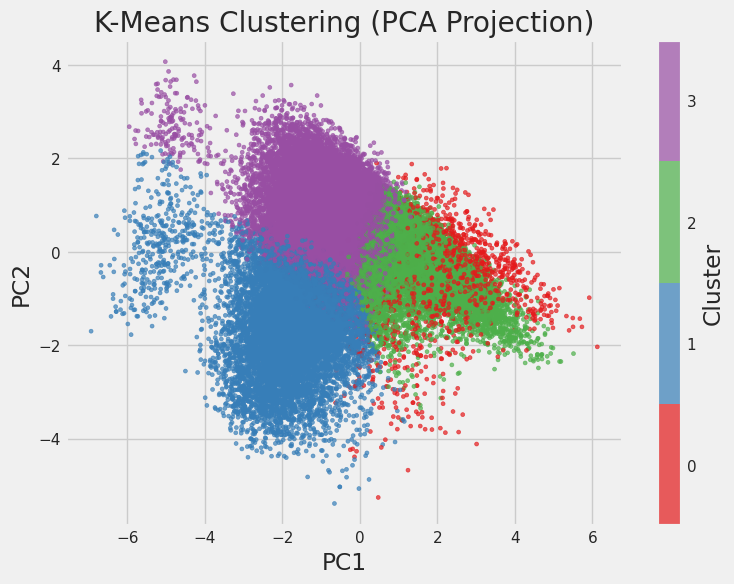

In [106]:
k = 4
cmap = plt.cm.Set1
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, k+0.5, 1), ncolors=k)

plt.figure(figsize=(8,6))
sc = plt.scatter(
    X_pca_2d[:,0],
    X_pca_2d[:,1],
    c=clusters,
    cmap=cmap,
    norm=norm,
    s=8,
    alpha=0.7
)

cbar = plt.colorbar(sc, ticks=range(k))
cbar.set_label('Cluster')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering (PCA Projection)')
plt.show()


#5. Evaluasi Model


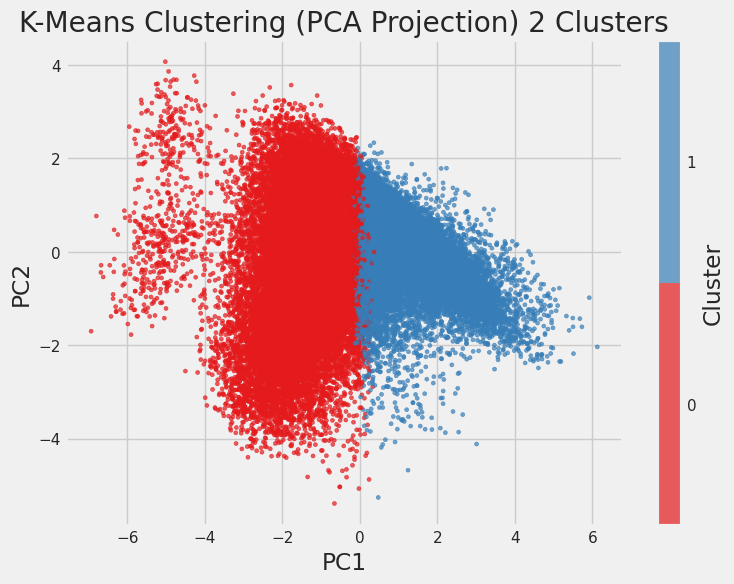

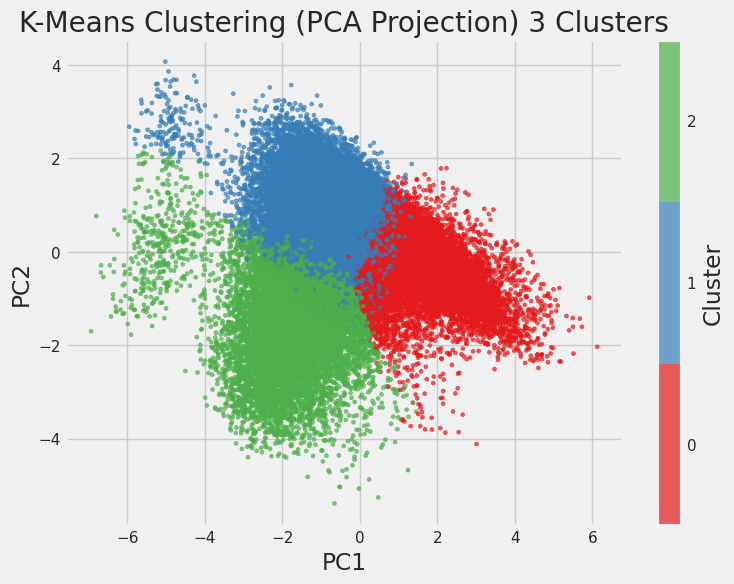

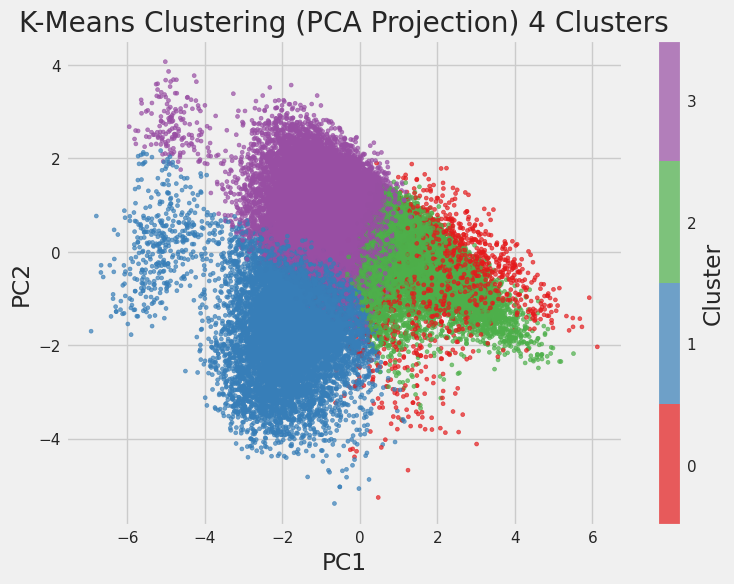

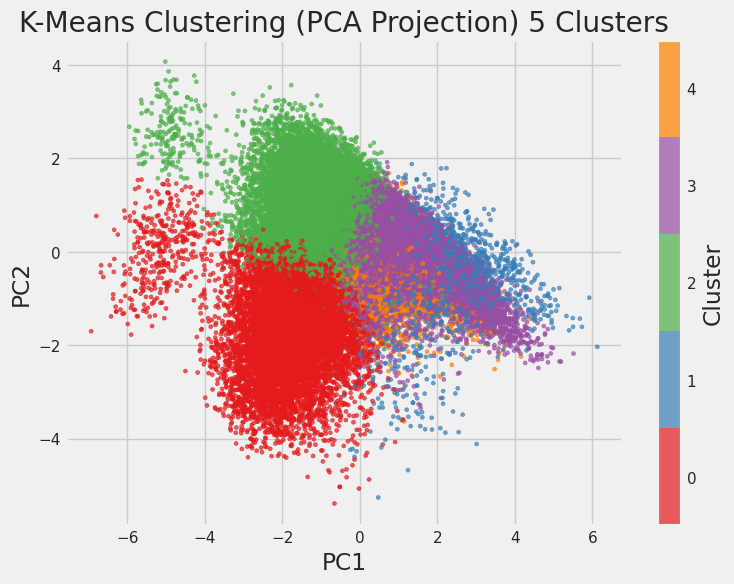

In [98]:
for k in range(2, 6):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
  clusters = kmeans.fit_predict(new_df)

  cmap = plt.cm.Set1
  norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, k+0.5, 1), ncolors=k)

  plt.figure(figsize=(8,6))
  sc = plt.scatter(
      X_pca_2d[:,0],
      X_pca_2d[:,1],
      c=clusters,
      cmap=cmap,
      norm=norm,
      s=8,
      alpha=0.7
  )

  cbar = plt.colorbar(sc, ticks=range(k))
  cbar.set_label('Cluster')

  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.title(f'K-Means Clustering (PCA Projection) {k} Clusters')
  plt.show()


Secara visual bagus K=3 namun Cluster loyal dan price sensitive menyatu, sehingga K=4 dipilih. K=5 juga menarik karena ada cluster di tengah yang bisa dianggap sebagai Niche Segment, namun cluster ini tidak begitu penting dan cluster yang lebih banyak menimbulkan oversegmentation

#6. Insight dan Rekomendasi

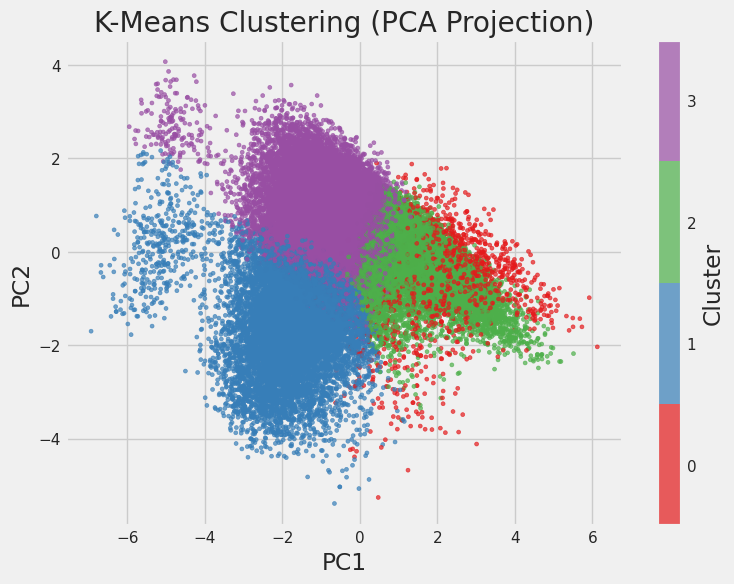

#Insight
* PC1 = Customer Value & Activity Level, yang berisi SEG_KM_SUM / total aktivitas terbang, BP_SUM / revenue, MEMBERSHIP_DAYS / loyalitas (tenure), dan AVG_KM_PER_FLIGHT / style terbang

* Semakin titik ke kiri, maka dimaknai low value dan jarang terbang. Sedangkan semakin titik ke kanan, maka dimaknai high value dan sering terbang.

* PC2 = Recency & Engagement Pattern, yang berisi LAST_TO_END / seberapa lama sejak terakhir terbang, AVG_INTERVAL / jarak antar flight, dan avg_discount / sensitivitas harga.

* Semakin ke atas, maka dimaknai masih aktif / recent, sedangkan semakin kebawah dimaknai sudah dormant / jarang terbang

#Dari hasil visualisasi cluster dengan PCA ditentukan segmentasi:
#1. Cluster 0 (merah) = mentok kanan atas, menunjukkan Core Loyal Customers.
#2. Cluster 1 (biru) = mentok kiri bawah, menunjukkan Dormant / Low Value Users.
#3. Cluster 2 (hijau) = kanan atas namun dibawah merah / Cluster 0, menunjukkan Active Users yang mungkin lebih Price-Sensitive.
#4. Cluster 3 (ungu) = mentok kiri atas, menunjukkan New / Growing Users.

#Rekomendasi
#1. Cluster 0 (Aktivitas tinggi, nilai transaksi besar, dan engagement relatif stabil)
* Program loyalitas eksklusif (priority boarding, bonus mileage khusus)

* Personalized offers berbasis histori perjalanan

* Hindari diskon besar dan lebih fokus ke experience & convenience

Tujuan: mempertahankan revenue utama dan meningkatkan lifetime value.
#2. Cluster 1 (Aktivitas rendah, lama tidak terbang, kontribusi nilai kecil)
* Re-activation campaign (email, push notification)

* Diskon terbatas & time-bound

* Jangan alokasikan resource berlebihan

Tujuan: menguji potensi reaktivasi dengan biaya minimal.

#3. Cluster 2 (Aktif dan cukup sering terbang, tetapi sensitif terhadap harga/promo.)
* Dynamic pricing & targeted promotions

* Bundling (flight + add-ons)

* Reward berbasis frekuensi, bukan nilai transaksi

* Dorong migrasi ke cluster loyal melalui benefit non-diskon

Tujuan: meningkatkan margin tanpa kehilangan frekuensi.

#4. Cluster 3 (Masih baru, engagement awal bagus, total nilai belum besar.)
* Onboarding journey yang kuat

* Edukasi benefit membership & loyalty program

* Promo ringan (welcome bonus)

* Dorong repeat booking dalam waktu dekat

Tujuan: konversi menjadi pelanggan loyal jangka panjang